# Visualizing with Histograms

## Counting Frequencies

A great way to understand a set of random data is to visualize it. A **histogram** is a chart that groups numbers into ranges (or "bins") and shows the count of how many values fall into each bin. This gives us a powerful visual sense of the data's distribution.

Let's start by writing a simple function to count the frequency of discrete outcomes, like the results of a die roll.

In [1]:
# This function counts occurrences of integers in a sequence.
# It assumes the outcomes are integers from 1 up to nbr_outcomes.
function count_histogram(nbr_outcomes, sequence)
    # Initialize a vector of zeros to store the count for each outcome.
    counts = zeros(Int, nbr_outcomes)
    # Loop through each result in the input sequence.
    for x in sequence
        # Increment the counter for the outcome 'x'.
        counts[x] += 1
    end
    # Return the vector of counts.
    return counts
end

count_histogram (generic function with 1 method)

Now, we can use this function to simulate rolling a fair six-sided die many times. By counting the outcomes and dividing by the number of trials, we can estimate the probability of landing on each face. According to the Law of Large Numbers, as we increase the number of trials, this experimental probability should get closer to the true theoretical probability of $1/6$.

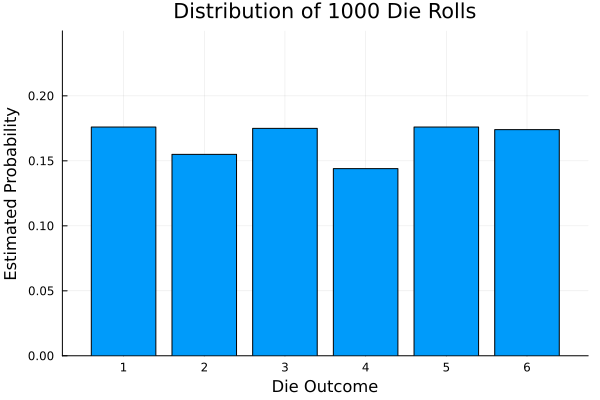

In [2]:
using Plots

function simulate_die(ntrials)
    # The possible outcomes of a single die roll.
    outcomes = 1:6
    
    # Simulate 'ntrials' rolls by sampling from the outcomes.
    rolls = rand(outcomes, ntrials)
    
    # Use our function to count the frequency of each outcome.
    counts = count_histogram(6, rolls)
    
    # Convert counts to probabilities by dividing by the number of trials.
    probabilities = counts / ntrials
    
    # Create a bar chart of the results.
    bar(outcomes, probabilities, 
        xlabel="Die Outcome", 
        ylabel="Estimated Probability", 
        title="Distribution of $ntrials Die Rolls",
        label=nothing, # We don't need a legend for a single series.
        ylim=(0, 0.25))
end

simulate_die(1000)

### Summing Multiple Dice

What happens to the distribution if we roll several dice and add up their outcomes? Let's generalize our simulation to explore this.

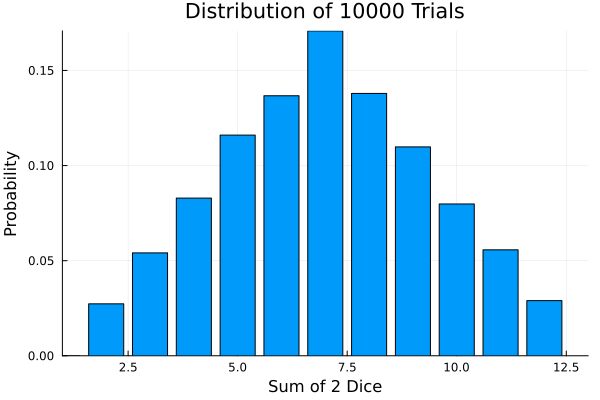

In [3]:
function simulate_sum_of_n_dice(ntrials, ndice)
    # Possible outcomes for a single die.
    die_faces = 1:6
    
    # Initialize a vector to store the sum of the dice for each trial.
    sums = zeros(Int, ntrials)
    
    # For each die, generate ntrials rolls and add them to the running sum.
    # This uses broadcasting (.+) for an efficient, element-wise sum.
    for i in 1:ndice
        sums .+= rand(die_faces, ntrials)
    end
    
    # The maximum possible sum is 6 * ndice.
    max_sum = 6 * ndice
    
    # Use our custom function to count the frequency of each possible sum.
    # Note: This creates counts for sums from 1 to max_sum. Any sums below 'ndice' will correctly have a count of 0.
    counts = count_histogram(max_sum, sums)
    
    # Convert counts to probabilities.
    probabilities = counts / ntrials
    
    # The full range of possible outcomes for the bar plot's x-axis.
    possible_outcomes = 1:max_sum
    
    # Create a bar chart of the resulting distribution.
    bar(possible_outcomes, probabilities,
        xlabel="Sum of $ndice Dice",
        ylabel="Probability",
        title="Distribution of $ntrials Trials",
        label=nothing,
        xlims=(ndice - 1, max_sum + 1)) # Adjust x-limits to focus on the action!
end

# Simulate the sum of two dice.
simulate_sum_of_n_dice(10000, 2)

Notice the triangular shape for two dice. The famous **Central Limit Theorem** states that as we add more and more independent random variables (like our dice rolls), their sum tends toward a normal distribution. Let's see this by simulating the sum of 50 dice!

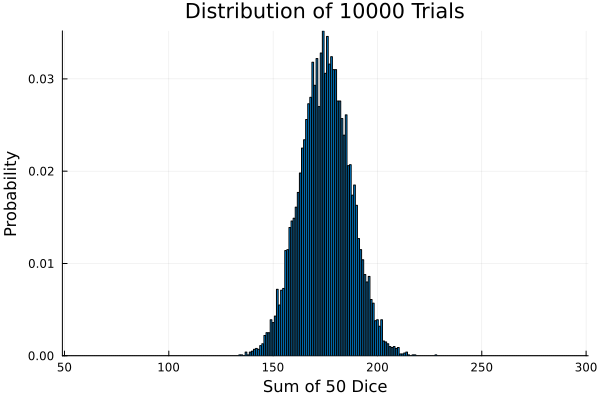

In [4]:
# With 50 dice, the distribution looks remarkably like a bell curve.
# Try experimenting with different numbers of trials and dice!
simulate_sum_of_n_dice(10000, 50)

## Using Built-in Histogram Functions

For continuous data, like the output of `randn()`, it's much easier to use a built-in function. The `histogram` function in `Plots.jl` automatically groups the data into a specified number of bins and plots the frequencies.

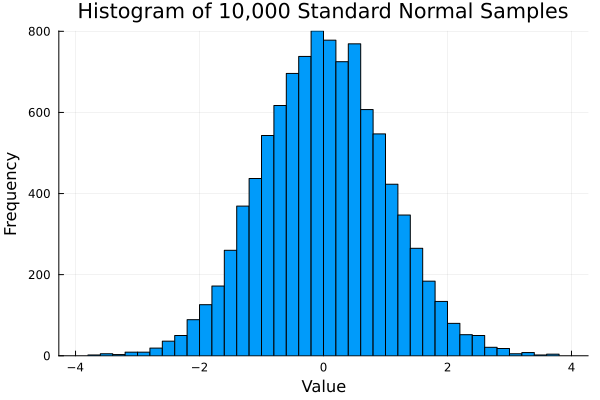

In [5]:
# Generate 10,000 random numbers from the standard normal distribution.
x = randn(10000)

# Let Plots.jl automatically bin the data into 50 containers.
histogram(x, bins=50, 
          label=nothing, 
          xlabel="Value", 
          ylabel="Frequency",
          title="Histogram of 10,000 Standard Normal Samples")